In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [2]:
data_folder = Path('C:\\Users\\marcb\\Desktop\\SpinGlassesModel\\data')
N = np.arange(100, 1100, 100)
B = 0.0
T = np.arange(0, 1.1, 0.1) * 1
iterations = 100000
seeds = 100

In [3]:
m = np.empty(shape=(11, N.size, T.size, seeds))
m[:] = np.nan
for i, n in enumerate(N):
    for j, t in enumerate(T):
        for seed in range(seeds):
            filename = data_folder / f"{n}_{B}_{t:.1f}_{iterations}" / f"{seed}.json"
            if filename.exists():
                with open(filename, 'r') as f:
                    dictionary = json.load(f)
                m[:, i, j, seed] = dictionary['m']
indices = dictionary['indices']
m_abs_mean = np.nanmean(np.abs(m), axis=3)
m_mean = np.nanmean(m, axis=3)

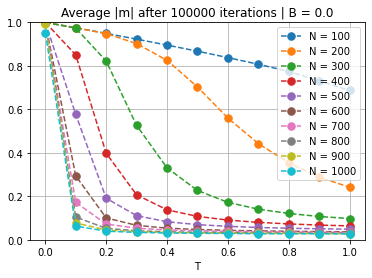

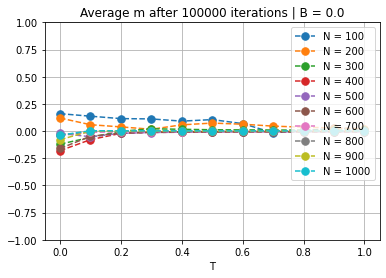

In [4]:
for plot_iter, data in enumerate([m_abs_mean, m_mean]):
    plt.figure()
    for i, n in enumerate(N):
        plt.plot(T, data[-1, i, :], '.--', markersize=15, label=f"N = {n}")
    plt.grid()
    plt.legend()
    plt.xlabel('T')
    if plot_iter == 0:
        plt.title(f"Average |m| after {iterations} iterations | B = {B:.1f}")
        plt.ylim(0, 1)
    else:
        plt.title(f"Average m after {iterations} iterations | B = {B:.1f}")
        plt.ylim(-1, 1)
plt.show()

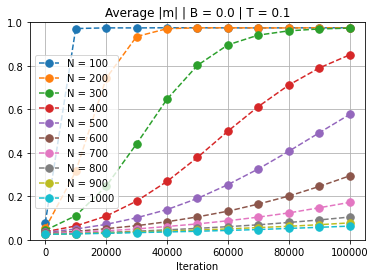

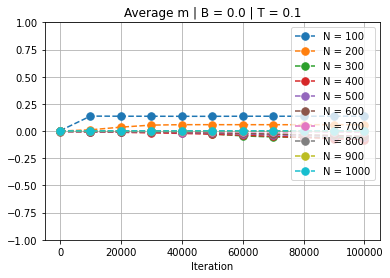

In [5]:
T_index = 1
for plot_iter, data in enumerate([m_abs_mean, m_mean]):
    plt.figure()
    for i, n in enumerate(N):
        plt.plot(indices, data[:, i, T_index], '.--', markersize=15, label=f"N = {n}")
    plt.grid()
    plt.legend()
    plt.xlabel('Iteration')
    if plot_iter == 0:
        plt.title(f"Average |m| | B = {B:.1f} | T = {T[T_index]}")
        plt.ylim(0, 1)
    else:
        plt.title(f"Average m | B = {B:.1f} | T = {T[T_index]}")
        plt.ylim(-1, 1)
plt.show()

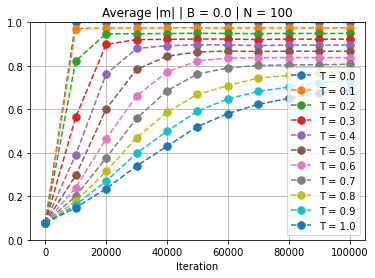

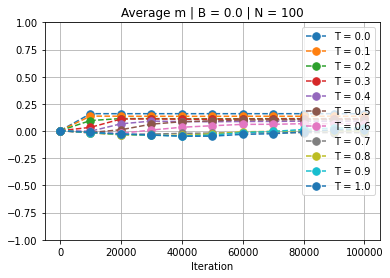

In [6]:
N_index = 0
for plot_iter, data in enumerate([m_abs_mean, m_mean]):
    plt.figure()
    for j, t in enumerate(T):
        plt.plot(indices, data[:, N_index, j], '.--', markersize=15, label=f"T = {t:.1f}")
    plt.grid()
    plt.legend()
    plt.xlabel('Iteration')
    if plot_iter == 0:
        plt.title(f"Average |m| | B = {B:.1f} | N = {N[N_index]}")
        plt.ylim(0, 1)
    else:
        plt.title(f"Average m | B = {B:.1f} | N = {N[N_index]}")
        plt.ylim(-1, 1)
plt.show()